# 1. Get the Data

In [ ]:
# Let allow this notebook to acces to our Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd  

/content


In [ ]:
# Let show the first five lines os our DataFrame

!head -n 5 ../content/gdrive/MyDrive/Colab_Notebook/calo_shower_data.csv

shower_depth,shower_width,type
102.72654711811397,41.06050908930105,hadron
55.95364443015233,19.10710571403495,electron
76.23793778203317,21.859595134791103,electron
145.82976544523277,18.478400829975243,hadron


In [ ]:
# Now Let import the important library

import sys, os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


##  1.1 Get and load the data

In [ ]:
# Now let upload the Data 

data_access = "../content/gdrive/MyDrive/Colab_Notebook/calo_shower_data.csv"


df = pd.read_csv(data_access) # This variable containing now our dataframe

In [ ]:
# Let show the first column to see 

df.head(10)

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron
5,116.530096,16.458007,hadron
6,144.131034,31.500592,hadron
7,111.753172,23.468908,hadron
8,137.597230,23.265585,hadron
9,34.956490,17.096947,electron


## 1.2 Samples of our DataFrame

In [ ]:
# Let show the differents columns of our data set
df.columns

Index(['shower_depth', 'shower_width', 'type'], dtype='object')

In [ ]:
# As we can see above, our DataFrame has three columns: "shower_depth", "shower_width" and "type" 

# Here the Features are :  "shower_depth", "shower_width"
            # And 
# The target variable is : "type"

In [ ]:
# Let check how many samples are in our DataFrame

df.shape  # We compute this to get the shape of the data


(100000, 3)

In [ ]:
# As we can see, our data set have 100000 rows and 3 columns. Then we can conclude that our data has 100000 samples
# Given by the following command: 

df.shape[0]

100000

<font color=red>$\checkmark$ </font>

# 2. Feature Scaling

## 2.1 Explain with math 

The gradient is likely to diverge if the features are not rescaled because of the large gap between the features value.
In the Mathematics context, recall that:
* $\mathbf{\theta}$ parameters are initialized with random numbers from 0 to 1.
* the expression of the hypothesis function given by
$$h_{\theta}(X) = \dfrac{1}{1+e^{-X\theta^{T}}}$$
We observe that, since the $\mathbf{\theta}$ are all positive and $X$(feaures) are positive large values then $1+e^{-X\theta^{T}}→0$ and consequently $h_{\theta}(X)→ 1$.
However, recall from the lectures notes (https://clairedavid.github.io/ml_in_hep/week1/class_algs_costF.html) for background sample case we have a high cost when $h_{\theta}(X)→ 1$

<font color=red>Excellent!</font>

## 2.2 Standarization

In [ ]:
# description of our dataframe
df.describe()

,shower_depth,shower_width
count,100000.000000,100000.000000
mean,99.847703,25.060322
std,31.360512,9.073636
min,0.013479,0.139829
25%,80.005289,18.726105
50%,97.648121,22.890813
75%,121.048161,30.209608
max,222.651768,73.082693


In [ ]:
MEAN_X1  = df["shower_depth"].mean() 
SIGMA_X1 = df["shower_depth"].std()
MEAN_X2  = df['shower_width'].mean()
SIGMA_X2 = df['shower_width'].std() 

df['shower_depth_scaled'] = (df['shower_depth'] - MEAN_X1) / SIGMA_X1
df['shower_width_scaled'] = (df['shower_width'] - MEAN_X2) / SIGMA_X2

<font color=red>$\checkmark$ </font>

In [ ]:
# Let see first lines of our updating dataframe
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled
0,102.726547,41.060509,hadron,0.091798,1.763371
1,55.953644,19.107106,electron,-1.399660,-0.656100
2,76.237938,21.859595,electron,-0.752850,-0.352750
3,145.829765,18.478401,hadron,1.466241,-0.725390
4,151.974596,33.539821,hadron,1.662182,0.934520


In [ ]:
df.describe()  #to see the description of our new dataframe with the new colummns scale

,shower_depth,shower_width,shower_depth_scaled,shower_width_scaled
count,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,99.847703,25.060322,3.672085e-16,6.220802e-16
std,31.360512,9.073636,1.000000e+00,1.000000e+00
min,0.013479,0.139829,-3.183437e+00,-2.746473e+00
25%,80.005289,18.726105,-6.327197e-01,-6.980902e-01
50%,97.648121,22.890813,-7.013857e-02,-2.391003e-01
75%,121.048161,30.209608,6.760240e-01,5.674998e-01
max,222.651768,73.082693,3.915882e+00,5.292517e+00


# 3.Data Preparation 

## 3.1 Adding x0 column

In [ ]:
# Let add the column x0 containning full 1
x0 = np.ones((len(df['shower_depth']),), dtype=int)  # We use this command to create the vector x0 that containning 1 evrywhere

# this command to create the column x0 in our dataframe
df['x0'] = x0  

#Let show the first five lines of updating dataframe
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0
0,102.726547,41.060509,hadron,0.091798,1.763371,1
1,55.953644,19.107106,electron,-1.399660,-0.656100,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1
4,151.974596,33.539821,hadron,1.662182,0.934520,1


## 3.2 Matrix X

Here our aims is to create the matrix X that contain the x0 column and the columns of the two scaled input features. The matirix X is like : 
x = [x0, shower_depth_scaled, shower_width_scaled]

In [ ]:
X = pd.DataFrame({'x0': x0, 'shower_depth_scaled': df['shower_depth_scaled'], 'shower_width_scaled': df['shower_width_scaled']},
                 columns = ['x0', 'shower_depth_scaled', 'shower_width_scaled'])

# After creating, we can show the first five line of our matrix X

X.head()

,x0,shower_depth_scaled,shower_width_scaled
0,1,0.091798,1.763371
1,1,-1.399660,-0.656100
2,1,-0.752850,-0.352750
3,1,1.466241,-0.725390
4,1,1.662182,0.934520


## 3.3 Labels to binary 

Here, our goal is to tranform the target variable who is alphabetical to binary variable (1 or 0 )

In [ ]:
# Let create the column y containing zero everywhere
df['y'] = np.zeros((len(df['shower_depth']),) , dtype=int) 

# Now we can update the column y given the condition 

df.loc[ df['type'] == 'electron', 'y'] = 1

df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0,y
0,102.726547,41.060509,hadron,0.091798,1.763371,1,0
1,55.953644,19.107106,electron,-1.399660,-0.656100,1,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1,0
4,151.974596,33.539821,hadron,1.662182,0.934520,1,0


## 3.4 Vector y 

Here, we have to extract from the dataframe this y column with the binary labels in a separate dataframe y.

In [ ]:
y = pd.DataFrame({'y': df['y']}, columns = ['y'])  

# let show the first lines of y to see: 
y.head()

,y
0,0
1,1
2,1
3,0
4,0


<font color=red>$\checkmark$ Perfect!</font>

# 4. DataFrames to Numpy

In [ ]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()

## 4.1 Shapes

In [ ]:
# Shape of X_train and X_test
# Recall that, X_train represents the dataframe of features we use to train the model
# and X_test are the dataframe of features we use to test the model.  

print("The Shape of features that we use to train our model is given by:",  X_train.shape)
print("The Shape of features that we will use to test our model is given by:",  X_test.shape)


The Shape of features that we use to train our model is given by: (80000, 3)
The Shape of features that we will use to test our model is given by: (20000, 3)


As we can see, X_train has 80000 rows and 3 columns. 
For X_test, it has 20000 rows and also 3 columns. Is make sense, because during the split of DataFrame as did above, we define the test-size = 0.2, that represent 20% of our entire DataFrame. 
Our entire DataFrame has the shape 100000 rows (for the samples) and 3 columns for the features. 

In [ ]:
# Shape of y_train and y_test
# Recall that, y_train represents the dataframe of target we use to train the model
# and y_test are the dataframe of target we use to test the model.  

print("The Shape of targets that we use to train our model is given by: " , y_train.shape)
print("The Shape of targets that we will use to test our model is given by: " , y_test.shape)


The Shape of targets that we use to train our model is given by:  (80000, 1)
The Shape of targets that we will use to test our model is given by:  (20000, 1)


As we can see, y_train has 80000 rows and 1 columns. 
For y_test, it has 20000 rows and also 1 columns. Is make sense, because during the split of DataFrame as did above, we define the test-size = 0.2, that represent 20% of our entire DataFrame. 
Our entire DataFrame has the shape 100000 rows (for the samples) and  only one target. 

<font color=red>$\checkmark$ This is really good work Fontaine, keep it up! </font>

## 4.2 Test size

From the shapes of X_test and y_test seen above, we can conclude that test_size represent the size of the part of entire Data set that will be used to test the model. In our case, this size is 0.2 meaning 20% of the entire Data set. 

<font color=red>$\checkmark$ </font>

5. Useful Functions

# 5. Useful Functions

Here we have to code the linear sum given by: 
$$z(x^{(i)}) = \sum_{j=0}^{n} x_{j}^{(i)}\theta_{j}$$

This sum represente in fact the product of two matrices. 

In [ ]:
# Let define the function to compute the linear sum of the features with the  parameters for each input sample.

def lin_sum(X, thetas):
  z = 0 
  thetas_trans = np.transpose(thetas)  # here we transpose the vector thetas to give the sense to multiplication matrix

  thetas_reshape = np.reshape(thetas_trans, (3,1)) # here I reshape the thetas vector because we want  our result to be in 2D

  return X@thetas_reshape   # multiplication of matrix  


<font color='red'>Good Job, commenting your code, What is the purpose of reshaping an array that has been transposed and has the correct shape ?</font>

In [ ]:
# define thetas 

thetas = (0, 0.5, 1)

In [ ]:
# let test our lin_sum function 

lin_sum(X_train, thetas)

array([[ 0.31481908],
       [-2.11578121],
       [-0.88844432],
       ...,
       [ 1.54853609],
       [-2.00969688],
       [-0.99138257]])

## 5.2 Logistic Function




Here our aim is to code the sigmoid function given by: 
$$ f(z) = \dfrac{1}{1 + \exp(-z)}$$

In [ ]:
# let define the sigmoid function

def sigmoid(z):
  fz = 1/(1+ (np.exp(-z)))
  return fz

<font color='red'>Good Job!</font>

In [ ]:
# Let test our sigmoid function 
sigmoid(lin_sum(X_train, thetas))

array([[0.57806111],
       [0.10757241],
       [0.29143097],
       ...,
       [0.8247022 ],
       [0.11818856],
       [0.27063908]])

## 5.3 Hypothesis Function

We code the hypothesis function given by $$h_{\theta}(X) = \dfrac{1}{1+e^{-X\theta^{T}}}$$

In [ ]:
def h_class(X, thetas):
  return sigmoid(lin_sum(X, thetas))

<font color='red'>Good Job!</font>

In [ ]:
# let test our previous function 
h_class(X_train,thetas)

array([[0.57806111],
       [0.10757241],
       [0.29143097],
       ...,
       [0.8247022 ],
       [0.11818856],
       [0.27063908]])

##5.4 Partial Derivatives of Cross-Entropy Cost Function

Now, we have to write the function to compute the partial derivative in each thetas: 

$$\dfrac{∂}{∂ θ_j}\, J(θ) = \dfrac{1}{m} \sum_{j=0}^{m}(h_{θ}(x^i) - y^i)x_{j}^{(i)}$$

In [ ]:
# Given the specific x_feature, the following function give us the partial derivative of coss function in one specific
# element of vector thetas=[theta_0, theta_1, theta_2]

def derivatives_cross_entropy(y_preds, y_obs, x_feature):
  m = len(y_preds)
  x_feature_reshape = np.reshape(x_feature, (len(x_feature),1)) # we reshape the x_feature to give the sense to the matrix multiplication
  residual = (y_preds - y_obs)*x_feature_reshape
  return residual.sum()/m
   



<font color='red'>Good Job! At least someone is using _numpy_!</font>

In [ ]:
# Let test our function.
# Here we compute the partial derivative of cost function on theta_0

derivatives_cross_entropy(h_class(X_train, thetas), y_train, X_train[:,0])  

0.16767967693944993

In [ ]:
# we use the following function to compute all the partial derivative of cost function and after that do the sum. 

def sum_derivatives_cross_entropy(y_preds, y_obs, X):  # the parameter X represent here the dataframe of entire features
  X_column = [X[:,0], X[:,1], X[:,2]]  # here X_column parcour the specific column of X 
  list_derivatives=[]
  somme_derivatives = 0

  for x_feature in X_column: 
    dev = derivatives_cross_entropy(y_preds, y_obs, x_feature) # we call our previous function to compute the partial derivative 
    list_derivatives.append(dev)

  for element in list_derivatives: 
    somme_derivatives += element
  
  return somme_derivatives


In [ ]:
# Let compute the partial derivative on theta_0
derivatives_cross_entropy(h_class(X_train, thetas), y_train, X_train[:,0])

0.16767967693944993

In [ ]:
# Let compute the partial derivative on theta_1
derivatives_cross_entropy(h_class(X_train, thetas), y_train, X_train[:,1])

0.45110270476383957

In [ ]:
# Let compute the partial derivative on theta_2
derivatives_cross_entropy(h_class(X_train, thetas), y_train, X_train[:,2])

0.3686783684857068

In [ ]:
# let now compute and get the sum of all the partial derivative 
sum_derivatives_cross_entropy(h_class(X_train, thetas), y_train, X_train)

0.9874607501889963

<font color='red'>Nice try!</font>

##5.5 Cross-Entropy Cost Function

We have the write the code to compute the cross-entropy cost function given by: 

$$J(θ) = -\dfrac{1}{m}\,\sum_{i=1}^{m} [y^{(i)} log(h_{θ}(x^{(i)}) + (1 - y^{(i)}) log(1 - h_{θ}(x^{(i)}) ]$$

In [ ]:
def cross_entropy_cost(y_vals, y_preds):
  m = len(y_vals)
  total_residus = (y_vals*np.log(y_preds) + (1-y_vals)*np.log(1- y_preds))/(-m)
  return total_residus.sum()


<font color='red'>Good Job!</font>

In [ ]:
# let test our cross_entropy_cost function
y_preds = h_class(X_train, thetas)

cross_entropy_cost(y_train, y_preds)

1.067737107162289

# 6. Classifier

<font color='red'>Setting $n = 3$ is not a good idea. If the feature matrix is changed, your code won't work because you would have to change it again. Avoid 
hardcoding. Set, $n$ to the number of columns of the feature matrix, since that is the number of features.</font>
```python
n = X.shape[1]
```

In [ ]:
# Hyperparameters
alpha = 0.5
N = 1000

# Number of features + 1 (number of columns in X)
n = 3

# Initialization of theta *row vector*
thetas = np.random.rand(1,3)

# Storing cost values for train and test datasets
costs_train = [] 
costs_test  = []

print("Starting gradient descent\n")

# -------------------
#   Start iterations
# -------------------
for i in range(1, N+1):

  # Get predictions (hypothesis function)
  y_preds = h_class(X_train, thetas)
  y_preds_test = h_class(X_test, thetas)

  # Calculate and store costs with train and test datasets
  J_train = cross_entropy_cost(y_train, y_preds); costs_train.append(J_train)
  J_test  = cross_entropy_cost(y_test, y_preds_test); costs_test.append(J_test)

  # Get partial derivatives d/dTheta_j 
  dJ_thetas = np.zeros(shape=(1, n))
  dJ_thetas[0,0] = derivatives_cross_entropy(y_preds, y_train, X_train[:,0])
  dJ_thetas[0,1] = derivatives_cross_entropy(y_preds, y_train, X_train[:,1])
  dJ_thetas[0,2] = derivatives_cross_entropy(y_preds, y_train, X_train[:,2])

  # Calculate new theta parameters:
  thetas_new = thetas - alpha*dJ_thetas

  # Update the parameters for the next iteration
  thetas = thetas_new
  costs_train.append(J_train)
  costs_test.append(J_test)

  # --------------------
  #  P R I N T O U T S
  # --------------------
  # Every 10 iterations and n > 100 every 100 iterations
  if (i<100 and i % 10 == 0) or (i>100 and i % 100 == 0):
    print('[%d]\tt0 = %4.4f  t1 = %4.4f  t2 = %4.4f  Cost = %4.4f  dJ0 = %4.4f  dJ1 = %4.4f  dJ2 = %4.4f' %
         ( i,   thetas[0,0], thetas[0,1], thetas[0,2],   J_train,  dJ_thetas[0,0],   dJ_thetas[0,1],   dJ_thetas[0,2]))

print(f'\nEnd of gradient descent after {i} iterations')

print('Optimized thetas:')
print(f'Theta 0 = {thetas[0,0]:.4f}, Theta 1 = {thetas[0,1]:.4f}, Theta 2 = {thetas[0,2]:.4f}')

Starting gradient descent

[10]	t0 = 0.0964  t1 = -0.9043  t2 = -0.6383  Cost = 0.4145  dJ0 = 0.0263  dJ1 = 0.1148  dJ2 = 0.0979
[20]	t0 = 0.0030  t1 = -1.3079  t2 = -0.9605  Cost = 0.3512  dJ0 = 0.0147  dJ1 = 0.0623  dJ2 = 0.0470
[30]	t0 = -0.0577  t1 = -1.5582  t2 = -1.1412  Cost = 0.3298  dJ0 = 0.0104  dJ1 = 0.0422  dJ2 = 0.0294
[40]	t0 = -0.1026  t1 = -1.7368  t2 = -1.2620  Cost = 0.3196  dJ0 = 0.0080  dJ1 = 0.0313  dJ2 = 0.0206
[50]	t0 = -0.1376  t1 = -1.8728  t2 = -1.3500  Cost = 0.3138  dJ0 = 0.0063  dJ1 = 0.0243  dJ2 = 0.0155
[60]	t0 = -0.1656  t1 = -1.9805  t2 = -1.4176  Cost = 0.3103  dJ0 = 0.0051  dJ1 = 0.0195  dJ2 = 0.0121
[70]	t0 = -0.1885  t1 = -2.0679  t2 = -1.4712  Cost = 0.3080  dJ0 = 0.0042  dJ1 = 0.0160  dJ2 = 0.0097
[80]	t0 = -0.2075  t1 = -2.1401  t2 = -1.5148  Cost = 0.3065  dJ0 = 0.0035  dJ1 = 0.0133  dJ2 = 0.0080
[90]	t0 = -0.2234  t1 = -2.2005  t2 = -1.5509  Cost = 0.3054  dJ0 = 0.0029  dJ1 = 0.0112  dJ2 = 0.0066
[200]	t0 = -0.3018  t1 = -2.4983  t2 = -1.7253  

<font color='red'>Good Job! Fontaine</font>

# 7. Plot cost versus epochs

In [ ]:
# definition of function to plot

def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):
  
  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

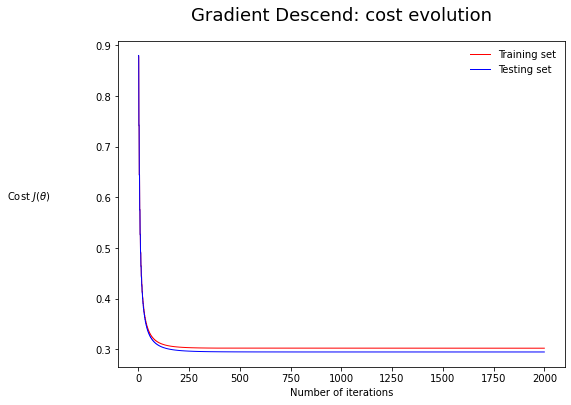

In [ ]:
# Now let plot our previous cost function
plot_cost_vs_iter(costs_train, costs_test, title= 'Gradient Descend: cost evolution')

## 7.1 Describe of the plot and fundamental difference between the two series train and test: 

This plot give us the visualization of the error (cost function) with respect to the sample number of epochs (taking here like the model’s complexity) for the training and testing sets. 

We can see that, there is a small gap between the train and test errors. This small gap can appear like a good thing. But it important to quantify the training error and relate it to the desired accuracy. 
The low training error indicate us the low bias. 

1.Difference: 

The train serie give us the distribution of the cost function during the training of our model. While the test serie above give us the cost function when our model is submitted to the new data.  

# 7.2 Large gap 

 If there is a bigger gap between the test and training values of the cost, that mean that our model has a hight variance. Recall that, the variance of model measure of the model’s sensitivity to statistical fluctuations of the training data set.

A large variance can be at the origin of Overfitting and our model will therefore suffer from an inability to generalize when it is subjected to new data.

<font color='red'>Good comments.</font>

# 8. Performance

In [ ]:
def make_predictions(thetas, X, y, boundary=0.5):

  bin_preds = [1 if value > boundary else 0 for value in h_class(X, np.array(thetas))[:,0] ] 

  return bin_preds

In [ ]:
preds = make_predictions(thetas, X_test, y_test, 0.5)
preds

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [ ]:
# Turn y_test into 1D array:
obs_test = y_test[:,0]
len(obs_test)

20000

## 8.1 Accuracy

$ACCURACY= \dfrac{T_P+T_N}{T_P+T_N+F_N+F_P}$
where
$T_P$ is the true positive which gives 1 as prediction when the observe value is 1, $T_N$ is the true negative which gives 0 as prediction when the observed value is 0, $F_P$ which predicts 1 while we observe 0 and $F_N$ which predicts 0 while we observed 1.

In [ ]:
# Let define the accuracy function 
def get_accuracy(obs_values, pred_values):
  compt= 0
  for a,b in zip(obs_values, pred_values):
     if (a == b):
       compt += 1
  return compt/len(pred_values)
  


In [ ]:
# Let test 
get_accuracy(obs_test, preds)

0.8806

<font color='red'>Good Job!</font>

## 8.2 Recall

$Recall=\dfrac{T_P}{T_P+F_N}$

In [ ]:
#Let define the Recall function 

def get_recall(obs_values, pred_values):
  compt_TP = 0 
  compt_FN = 0

  for a,b in zip(obs_values, pred_values): 
    if(a==1 and b==1):
      compt_TP += 1
    elif (a==1 and b==0):
      compt_FN += 1
  return (compt_TP)/(compt_TP + compt_FN)

In [ ]:
# LEt test our recall function
get_recall(obs_test, preds)

0.9049005824462744

<font color='red'>Good Job!</font>

In [ ]:
2